<a href="https://colab.research.google.com/github/Supaporn-Bututham/data_viz_2022/blob/main/BasicPython%26DataViz%20midterm2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Python&DataViz กลุ่มอะไรก็ได้

# เตรียมข้อมูล (20 คะแนน)

In [7]:
import pandas as pd
import os

In [8]:
from google.colab import drive # เชื่อมต่อ colab กับไดฟ์
drive.mount('/content/drive') 
path = '/content/drive/My Drive/dataviz_2021_data' # ชี้แหล่งที่อยู่ของไฟล์ในไดฟ์

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data_file_path = os.path.join(path,'confirmed-cases.csv')
data_covid19 = pd.read_excel(data_file_path) # อ่านข้อมูลในไฟล์ excel ที่เรียกมา

In [12]:
data_covid19.head() # แสดงข้อมูลใน excel เฉพาะ 5 บรรทัดแรก

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN


In [13]:
data_covid19.shape # ขนาดของข้อมูลในไฟล์ แถวxคอลัมน์

(816989, 11)

## หาค่า missing

In [14]:
data_covid19.isnull().sum() # เช็กดูว่าแต่ละคอลัมน์มีค่า Missing กี่ค่า

No.                           0
announce_date                 0
Notified date              2795
sex                       53005
age                       74778
Unit                      74637
nationality               82076
province_of_isolation       272
risk                       1094
province_of_onset         97112
district_of_onset        155300
dtype: int64

In [15]:
# มีค่า Missing ทุกคอลัมน์ยกเว้นคอลัมน์ No. และ announce_date
# จะทำการแทนค่า Missing ด้วยค่าเฉลี่ยของข้อมูลในข้อมูลเชิงปริมาณ & ใส่คำว่า 'ไม่มีข้อมูล' ในข้อมูลเชิงคุณภาพ

## แทนค่า Missing ใน 'age' 

In [16]:

age_mean = data_covid19[['age']].mean() # หาอายุเฉลี่ย ตั้งชื่อว่า age_mean
age_mean

age    35.67704
dtype: float64

In [17]:
data_covid19[['age']] = data_covid19[['age']].fillna(age_mean) # ใส่อายุเฉลี่ยที่คำนวณได้ลงในช่อง Missing

In [18]:
data_covid19.isnull().sum() # เช็กดูว่าคอลัมน์ 'age' มีค่า Missing เป็น 0 หรือยัง

No.                           0
announce_date                 0
Notified date              2795
sex                       53005
age                           0
Unit                      74637
nationality               82076
province_of_isolation       272
risk                       1094
province_of_onset         97112
district_of_onset        155300
dtype: int64

## แทนค่า Missing ใน 'risk' 

In [19]:
data_covid19[['risk']] = data_covid19[['risk']].fillna('ไม่มีข้อมูล') # ใส่คำว่า 'ไม่มีข้อมูล' ลงในช่อง Missing ของคอลัมน์ risk

In [20]:
data_covid19.isnull().sum() # เช็กดูว่าคอลัมน์ 'risk' มีค่า Missing เป็น 0 หรือยัง

No.                           0
announce_date                 0
Notified date              2795
sex                       53005
age                           0
Unit                      74637
nationality               82076
province_of_isolation       272
risk                          0
province_of_onset         97112
district_of_onset        155300
dtype: int64

## ปรับแก้ข้อมูลให้เป็นรูปแบบเดียวกันและแทนค่า Missing ใน 'province_of_onset'

In [21]:
set(data_covid19['province_of_onset']) # ดู set ของข้อมูลจังหวัดที่เริ่มมีอาการ

{nan,
 '\xa0กาญจนบุรี',
 '\xa0ชลบุรี',
 '\xa0ตราด',
 '\xa0นครปฐม',
 '\xa0สมุทรสงคราม',
 '\xa0สมุทรสาคร',
 '\xa0อุทัยธานี',
 'กทม',
 'กระบี่',
 'กรุงเทพมหานคร',
 'กัมพูชา',
 'กาญจนบุรี',
 'กาฬสินธิ์',
 'กาฬสินธุ์',
 'กาฬสินธ์',
 'กำแพงเพชร',
 'ขอนแก่น',
 'ขอนแก่่น',
 'ขัยนาท',
 'จันทบุรี',
 'ฉะเชิงเทรา',
 'ชมพร',
 'ชลบุรี',
 'ชลบุรี\t',
 'ชลบุุรี',
 'ชัยนาท',
 'ชัยภูมิ',
 'ชุมพร',
 'ชุุมพร',
 'ตรัง',
 'ตราด',
 'ตาก',
 'ท้ายบ้าน',
 'ธารโต',
 'นคนปฐม',
 'นคปฐม',
 'นครนาชสีมา',
 'นครนายก',
 'นครปฐม',
 'นครปบม',
 'นครพนม',
 'นครราชสีมา',
 'นครศรีธรรมราช',
 'นครศร๊ะรรมราช',
 'นครสวรรค์',
 'นตรปฐม',
 'นนทบุรี',
 'นราธิวาส',
 'นอกเขต',
 'นาราธิวาส',
 'นาวัง',
 'น่าน',
 'บางกะปิ',
 'บึงกาฬ',
 'บึงโขงหลง',
 'บุรีรัมย์',
 'บุรีรัมย์\xa0',
 'บุรีรัยม์',
 'บ้านหลวง',
 'ปทุมธานี',
 'ปทุมธานี.',
 'ปทุมธานีี',
 'ปทุุมธานี',
 'ปมุมธานี',
 'ประจวบคีรีขันธ์',
 'ประจวบฯ',
 'ปราจีนบุรี',
 'ปลวกแดง',
 'ปลายพระยา',
 'ปัตตานี',
 'ปัว',
 'ปุทมธานี',
 'พม่า',
 'พระนครศรีอยุธยา',
 'พะเยา',
 'พังงา',
 'พัทลุง',
 

In [22]:
len(set(data_covid19['province_of_onset'])) # มีข้อมูลกี่แบบใน 'province_of_onset'

180

In [23]:
# เปลี่ยนข้อมูล 'province_of_onset' ให้อยู่ในรูปแบบเดียวกัน
data_covid19['province_of_onset'].replace({'\xa0กาญจนบุรี':'กาญจนบุรี',
'\xa0ชลบุรี':'ชลบุรี',
'\xa0ตราด':'ตราด',
'\xa0นครปฐม':'นครปฐม',
'\xa0สมุทรสงคราม':'สมุทรสงคราม',
'\xa0สมุทรสาคร':'สมุทรสาคร',
'\xa0อุทัยธานี':'อุทัยธานี',
'กทม':'กรุงเทพมหานคร',
'กาฬสินธิ์':'กาฬสินธุ์',
'กาฬสินธ์':'กาฬสินธุ์',
'ขอนแก่่น':'ขอนแก่น',
'ขัยนาท':'ชัยนาท',
'ชมพร':'ชุมพร',
'ชลบุรี\t':'ชลบุรี',
'ชลบุุรี':'ชลบุรี',
'ชุุมพร':'ชุมพร',
'ท้ายบ้าน':'สมุทรปราการ',
'ธารโต':'ยะลา',
'นคนปฐม':'นครปฐม',
'นคปฐม':'นครปฐม',
'นครนาชสีมา':'นครราชสีมา',
'นครปบม':'นครปฐม',
'นครศร๊ะรรมราช':'นครศรีธรรมราช',
'นตรปฐม':'นครปฐม',
'นาราธิวาส':'นราธิวาส',
'นาวัง':'หนองบัวลำภู',
'บางกะปิ':'กรุงเทพมหานคร',
'บึงโขงหลง':'บึงกาฬ',
'บุรีรัมย์\xa0':'บุรีรัมย์',
'บุรีรัยม์':'บุรีรัมย์',
'บ้านหลวง':'น่าน',
'ปทุมธานี.':'ปทุมธานี',
'ปทุมธานีี':'ปทุมธานี',
'ปทุุมธานี':'ปทุมธานี',
'ปมุมธานี':'ปทุมธานี',
'ประจวบฯ':'ประจวบคีรีขันธ์',
'ปลวกแดง':'ระยอง',
'ปลายพระยา':'กระบี่',
'ปัว':'น่าน',
'ปุทมธานี':'ปทุมธานี',
'พิษณูโลก':'พิษณุโลก',
'ภูเพียง':'น่าน',
'มหาสาคาม':'มหาสารคาม',
'ยานนาวา':'กรุงเทพมหานคร',
'ร้องกวาง':'แพร่',
'ลอง':'แพร่',
'ลาดพร้าว':'กรุงเทพมหานคร',
'ลำลูกกา':'ปทุมธานี',
'วังชิ้น':'ลำปาง',
'ศรีษะเกษ':'ศรีสะเกษ',
'สงขลา\u200b':'สงขลา',
'สมถทรปราการ':'สมุทรปราการ',
'สมทรสาคร':'สมุทรสาคร',
'สมุครปราการ':'สมุทรปราการ',
'สมุทรปรากร':'สมุทรปราการ',
'สมุทรปรากรร':'สมุทรปราการ',
'สมุทราปราการ':'สมุทรปราการ',
'สมุทสงคราม':'สมุทรสงคราม',
'สมุทสาคร':'สมุทรสาคร',
'สมุุทรปราการ':'สมุทรปราการ',
'สมุุทรสาคร':'สมุทรสาคร',
'สอง':'แพร่',
'สองแคว':'น่าน',
'สะแก้ว':'สระแก้ว',
'สารภี':'เชียงใหม่',
'สุทรปราการ':'สมุทรปราการ',
'สุมทรปราการ':'สมุทรปราการ',
'สุมทรสาคร':'สมุทรสาคร',
'สมุุทรปราการ':'สมุทรปราการ',
'สุมุทรสาคร':'สมุทรสาคร',
'สุราษฎร์์ธานี':'สุราษฎร์ธานี',
'สุราษฏร์ธานี':'สุราษฎร์ธานี',
'สุวรรณภูมิ':'กรุงเทพมหานคร',
'สุุราษฎร์ธานี':'สุราษฎร์ธานี',
'สูงเม่น':'แพร่',
'หนองบััวลำภู':'หนองบัวลำภู',
'หนองม่วงไข่':'แพร่',
'อยุทธยา':'พระนครศรีอยุธยา',
'อยุธยา':'พระนครศรีอยุธยา',
'อุดรธานีี':'อุดรธานี',
'อุบลราขธานี':'อุบลราชธานี',
'อุุดรธาน':'อุดรธานี',
'อุุดรธานี':'อุดรธานี',
'อุุตรดิตถ์':'อุตรดิตถ์',
'อุุทัยธานี':'อุทัยธานี',
'เชีียงราย':'เชียงราย',
'เด่นชัย':'แพร่',
'เพชรบุูรณ์':'เพชรบูรณ์',
'เมือง':'แพร่',
'เมืองน่าน':'น่าน',
'เรือ':'เลย',
'เวียงสา':'น่าน'}, inplace=True)


In [24]:
len(set(data_covid19['province_of_onset'])) # มีข้อมูลกี่แบบใน 'province_of_onset' เมื่อปรับแก้แล้ว

89

รูปแบบของ 'province_of_onset' ขณะนี้เหลือ 86 รูปแบบ
นั่นก็คือจำนวนจังหวัด 77 จังหวัด + 'nan' + 'กัมพูชา' + 'นอกเขต' + 'พม่า' + 'มาเลเซีย' + 'เวียงจันทร์' + 'แล้วป่วย' + 'ไม่ระบุ' + 'สถานที่ทำงาน' = 86

In [25]:
data_covid19[['province_of_onset']] = data_covid19[['province_of_onset']].fillna('ไม่ระบุ') # ใส่คำว่า 'ไม่ระบุ' ลงในช่อง Missing ของคอลัมน์ 'province_of_onset'

In [26]:
data_covid19.isnull().sum() # เช็กดูว่าคอลัมน์ 'province_of_onset' มีค่า Missing เป็น 0 หรือยัง

No.                           0
announce_date                 0
Notified date              2795
sex                       53005
age                           0
Unit                      74637
nationality               82076
province_of_isolation       272
risk                          0
province_of_onset             0
district_of_onset        155300
dtype: int64

# สร้างตารางภูมิภาค

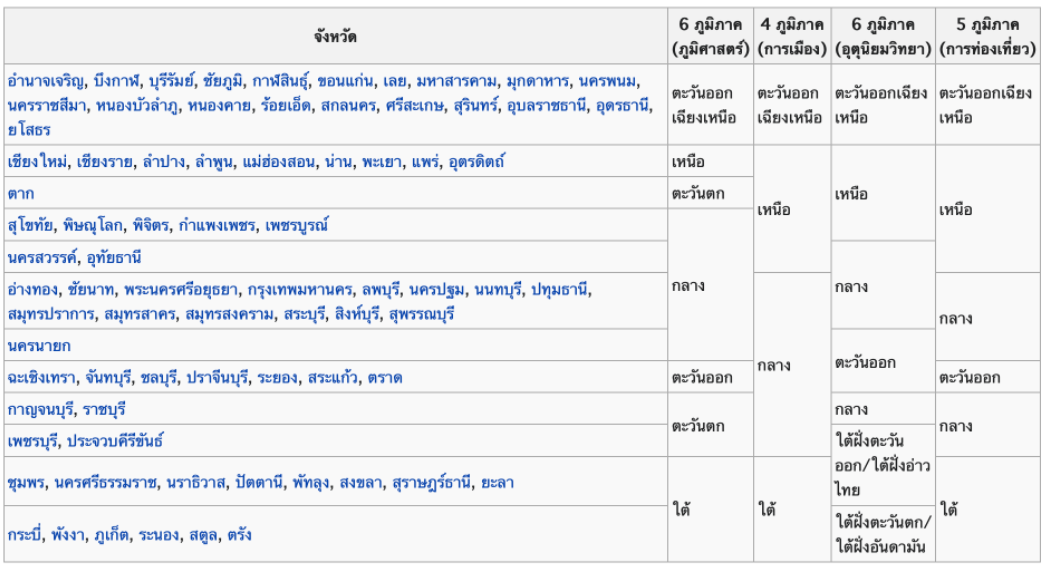

## ทำข้อมูลตารางภูมิภาคของแต่ละจังหวัดก่อน โดยมีทั้งหมด 12 ตาราง

In [27]:
data_region1 = { 'จังหวัด': ['อำนาจเจริญ','บึงกาฬ', 'บุรีรัมย์', 'ชัยภูมิ', 'กาฬสินธุ์', 'ขอนแก่น', 'เลย', 'มหาสารคาม', 'มุกดาหาร', 'นครพนม', 'นครราชสีมา', 'หนองบัวลำภู', 'หนองคาย', 'ร้อยเอ็ด', 'สกลนคร', 'ศรีสะเกษ', 'สุรินทร์', 'อุบลราชธานี', 'อุดรธานี', 'ยโสธร'],
             'ภูมิศาสตร์': ['ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ'],
             'การเมือง': ['ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ'],
             'อุตุนิยมวิทยา': ['ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ'],
             'การท่องเที่ยว': ['ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ', 'ตะวันออกเฉียงเหนือ']
}
df_region1 = pd.DataFrame.from_dict(data_region1) # ทำเป็นตาราง
df_region1

,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
1,บึงกาฬ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
2,บุรีรัมย์,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
3,ชัยภูมิ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
4,กาฬสินธุ์,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
5,ขอนแก่น,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
6,เลย,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
7,มหาสารคาม,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
8,มุกดาหาร,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
9,นครพนม,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ


In [28]:
data_region2 = { 'จังหวัด': ['เชียงใหม่', 'เชียงราย', 'ลำปาง', 'ลำพูน', 'แม่ฮ่องสอน', 'น่าน', 'พะเยา', 'แพร่', 'อุตรดิตถ์'],
             'ภูมิศาสตร์': ['เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ'],
             'การเมือง': ['เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ'],
             'อุตุนิยมวิทยา': ['เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ'],
             'การท่องเที่ยว': ['เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ']
}
df_region2 = pd.DataFrame.from_dict(data_region2)
df_region2

,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ
1,เชียงราย,เหนือ,เหนือ,เหนือ,เหนือ
2,ลำปาง,เหนือ,เหนือ,เหนือ,เหนือ
3,ลำพูน,เหนือ,เหนือ,เหนือ,เหนือ
4,แม่ฮ่องสอน,เหนือ,เหนือ,เหนือ,เหนือ
5,น่าน,เหนือ,เหนือ,เหนือ,เหนือ
6,พะเยา,เหนือ,เหนือ,เหนือ,เหนือ
7,แพร่,เหนือ,เหนือ,เหนือ,เหนือ
8,อุตรดิตถ์,เหนือ,เหนือ,เหนือ,เหนือ


In [29]:
data_region3 = { 'จังหวัด': ['ตาก'],
             'ภูมิศาสตร์': ['ตะวันตก'],
             'การเมือง': ['เหนือ'],
             'อุตุนิยมวิทยา': ['เหนือ'],
             'การท่องเที่ยว': ['เหนือ']
}
df_region3 = pd.DataFrame.from_dict(data_region3)
df_region3

,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,ตาก,ตะวันตก,เหนือ,เหนือ,เหนือ


In [30]:
data_region4 = { 'จังหวัด': ['สุโขทัย', 'พิษณุโลก', 'พิจิตร', 'กำแพงเพชร', 'เพชรบูรณ์'],
             'ภูมิศาสตร์': ['กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง'],
             'การเมือง': ['เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ'],
             'อุตุนิยมวิทยา': ['เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ'],
             'การท่องเที่ยว': ['เหนือ', 'เหนือ', 'เหนือ', 'เหนือ', 'เหนือ']
}
df_region4 = pd.DataFrame.from_dict(data_region4)
df_region4

,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,สุโขทัย,กลาง,เหนือ,เหนือ,เหนือ
1,พิษณุโลก,กลาง,เหนือ,เหนือ,เหนือ
2,พิจิตร,กลาง,เหนือ,เหนือ,เหนือ
3,กำแพงเพชร,กลาง,เหนือ,เหนือ,เหนือ
4,เพชรบูรณ์,กลาง,เหนือ,เหนือ,เหนือ


In [31]:
data_region5 = { 'จังหวัด': ['นครสวรรค์', 'อุทัยธานี'],
             'ภูมิศาสตร์': ['กลาง','กลาง'],
             'การเมือง': ['เหนือ','เหนือ'],
             'อุตุนิยมวิทยา': ['กลาง','กลาง'],
             'การท่องเที่ยว': ['เหนือ','เหนือ']
}
df_region5 = pd.DataFrame.from_dict(data_region5)
df_region5

,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,นครสวรรค์,กลาง,เหนือ,กลาง,เหนือ
1,อุทัยธานี,กลาง,เหนือ,กลาง,เหนือ


In [32]:
data_region6 = { 'จังหวัด': ['อ่างทอง', 'ชัยนาท', 'พระนครศรีอยุธยา', 'กรุงเทพมหานคร','ลพบุรี', 'นครปฐม', 'นนทบุรี', 'ปทุมธานี', 'สมุทรปราการ', 'สมุทรสาคร', 'สมุทรสงคราม', 'สระบุรี', 'สิงห์บุรี', 'สุพรรณบุรี'],
             'ภูมิศาสตร์': ['กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง'],
             'การเมือง': ['กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง'],
             'อุตุนิยมวิทยา': ['กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง'],
             'การท่องเที่ยว': ['กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง']
}
df_region6 = pd.DataFrame.from_dict(data_region6)
df_region6

,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,อ่างทอง,กลาง,กลาง,กลาง,กลาง
1,ชัยนาท,กลาง,กลาง,กลาง,กลาง
2,พระนครศรีอยุธยา,กลาง,กลาง,กลาง,กลาง
3,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
4,ลพบุรี,กลาง,กลาง,กลาง,กลาง
5,นครปฐม,กลาง,กลาง,กลาง,กลาง
6,นนทบุรี,กลาง,กลาง,กลาง,กลาง
7,ปทุมธานี,กลาง,กลาง,กลาง,กลาง
8,สมุทรปราการ,กลาง,กลาง,กลาง,กลาง
9,สมุทรสาคร,กลาง,กลาง,กลาง,กลาง


In [33]:
data_region7 = { 'จังหวัด': ['นครนายก'],
             'ภูมิศาสตร์': ['กลาง'],
             'การเมือง': ['กลาง'],
             'อุตุนิยมวิทยา': ['ตะวันออก'],
             'การท่องเที่ยว': ['กลาง']
}
df_region7 = pd.DataFrame.from_dict(data_region7)
df_region7

,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,นครนายก,กลาง,กลาง,ตะวันออก,กลาง


In [34]:
data_region8 = { 'จังหวัด': ['ฉะเชิงเทรา', 'จันทบุรี', 'ชลบุรี', 'ปราจีนบุรี', 'ระยอง', 'สระแก้ว', 'ตราด'],
             'ภูมิศาสตร์': ['ตะวันออก', 'ตะวันออก', 'ตะวันออก', 'ตะวันออก', 'ตะวันออก', 'ตะวันออก', 'ตะวันออก'],
             'การเมือง': ['กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง', 'กลาง'],
             'อุตุนิยมวิทยา': ['ตะวันออก', 'ตะวันออก', 'ตะวันออก', 'ตะวันออก', 'ตะวันออก', 'ตะวันออก', 'ตะวันออก'],
             'การท่องเที่ยว': ['ตะวันออก', 'ตะวันออก', 'ตะวันออก', 'ตะวันออก', 'ตะวันออก', 'ตะวันออก', 'ตะวันออก']
}
df_region8 = pd.DataFrame.from_dict(data_region8)
df_region8

,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,ฉะเชิงเทรา,ตะวันออก,กลาง,ตะวันออก,ตะวันออก
1,จันทบุรี,ตะวันออก,กลาง,ตะวันออก,ตะวันออก
2,ชลบุรี,ตะวันออก,กลาง,ตะวันออก,ตะวันออก
3,ปราจีนบุรี,ตะวันออก,กลาง,ตะวันออก,ตะวันออก
4,ระยอง,ตะวันออก,กลาง,ตะวันออก,ตะวันออก
5,สระแก้ว,ตะวันออก,กลาง,ตะวันออก,ตะวันออก
6,ตราด,ตะวันออก,กลาง,ตะวันออก,ตะวันออก


In [35]:
data_region9 = { 'จังหวัด': ['กาญจนบุรี', 'ราชบุรี'],
             'ภูมิศาสตร์': ['ตะวันตก','ตะวันตก'],
             'การเมือง': ['กลาง','กลาง'],
             'อุตุนิยมวิทยา': ['กลาง','กลาง'],
             'การท่องเที่ยว': ['กลาง','กลาง']
}
df_region9 = pd.DataFrame.from_dict(data_region9)
df_region9

,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,กาญจนบุรี,ตะวันตก,กลาง,กลาง,กลาง
1,ราชบุรี,ตะวันตก,กลาง,กลาง,กลาง


In [36]:
data_region10 = { 'จังหวัด': ['เพชรบุรี', 'ประจวบคีรีขันธ์'],
             'ภูมิศาสตร์': ['ตะวันตก','ตะวันตก'],
             'การเมือง': ['กลาง','กลาง'],
             'อุตุนิยมวิทยา': ['ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย'],
             'การท่องเที่ยว': ['กลาง','กลาง']
}
df_region10 = pd.DataFrame.from_dict(data_region10)
df_region10

,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,เพชรบุรี,ตะวันตก,กลาง,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,กลาง
1,ประจวบคีรีขันธ์,ตะวันตก,กลาง,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,กลาง


In [37]:
data_region11 = { 'จังหวัด': ['ชุมพร', 'นครศรีธรรมราช','นราธิวาส', 'ปัตตานี', 'พัทลุง', 'สงขลา', 'สุราษฎร์ธานี', 'ยะลา'],
             'ภูมิศาสตร์': ['ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้'],
             'การเมือง': ['ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้'],
             'อุตุนิยมวิทยา': ['ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย', 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย', 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย', 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย', 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย', 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย', 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย', 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย'],
             'การท่องเที่ยว': ['ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้']
}
df_region11 = pd.DataFrame.from_dict(data_region11)
df_region11

,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,ชุมพร,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้
1,นครศรีธรรมราช,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้
2,นราธิวาส,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้
3,ปัตตานี,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้
4,พัทลุง,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้
5,สงขลา,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้
6,สุราษฎร์ธานี,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้
7,ยะลา,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้


In [38]:
data_region12 = { 'จังหวัด': ['กระบี่', 'พังงา', 'ภูเก็ต', 'ระนอง', 'สตูล', 'ตรัง'],
             'ภูมิศาสตร์': ['ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้'],
             'การเมือง': ['ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้'],
             'อุตุนิยมวิทยา': ['ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน', 'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน', 'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน', 'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน', 'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน', 'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน'],
             'การท่องเที่ยว': ['ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้', 'ใต้']
}
df_region12 = pd.DataFrame.from_dict(data_region12)
df_region12

,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,กระบี่,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
1,พังงา,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
2,ภูเก็ต,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
3,ระนอง,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
4,สตูล,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
5,ตรัง,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้


## รวมตารางเข้าด้วยกัน


In [39]:
df_region_concat = pd.concat([df_region1, df_region2, df_region3, df_region4, df_region5, df_region6,
                                df_region7, df_region8, df_region9, df_region10, df_region11, df_region12])  
df_region_concat

,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
1,บึงกาฬ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
2,บุรีรัมย์,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
3,ชัยภูมิ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
4,กาฬสินธุ์,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
...,...,...,...,...,...
1,พังงา,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
2,ภูเก็ต,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
3,ระนอง,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
4,สตูล,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้


## เชื่อมตาราง data_covid19 กับ df_region_concat 
โดยใช้ 'province_of_onset' และ 'จังหวัด' เป็นตัวเชื่อม

In [40]:
covid19_region = data_covid19.merge(df_region_concat,how='left',left_on='province_of_onset',right_on='จังหวัด')
covid19_region.head()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,1.0,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
1,2.0,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
2,3.0,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,นครปฐม,กลาง,กลาง,กลาง,กลาง
3,4.0,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
4,5.0,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง


# คำถาม

## 1.อายุของผู้ป่วยคนแรกในแต่ละภูมิภาค (เหนือ, กลาง, ใต้, ...) (20 คะแนน)

### แบ่งตามภูมิศาสตร์

In [41]:
Q1a = pd.concat([covid19_region[covid19_region['ภูมิศาสตร์']=='กลาง'].head(1), covid19_region[covid19_region['ภูมิศาสตร์']=='ตะวันตก'].head(1),
           covid19_region[covid19_region['ภูมิศาสตร์']=='ตะวันออก'].head(1), covid19_region[covid19_region['ภูมิศาสตร์']=='ตะวันออกเฉียงเหนือ'].head(1),
           covid19_region[covid19_region['ภูมิศาสตร์']=='เหนือ'].head(1), covid19_region[covid19_region['ภูมิศาสตร์']=='ใต้'].head(1),
           covid19_region[covid19_region['ภูมิศาสตร์']=='ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน'].head(1), covid19_region[covid19_region['ภูมิศาสตร์']=='ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย'].head(1),], axis=0)

In [42]:
Q1a

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,1.0,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
7,8.0,2020-01-26,NaT,หญิง,73.0,ปี,China,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ,ประจวบคีรีขันธ์,หัวหิน,ประจวบคีรีขันธ์,ตะวันตก,กลาง,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,กลาง
31,32.0,2020-02-08,NaT,ชาย,24.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,NaN,ชลบุรี,ตะวันออก,กลาง,ตะวันออก,ตะวันออก
181,182.0,2020-03-18,2020-03-15,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง,ขอนแก่น,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
16,17.0,2020-01-31,NaT,ชาย,28.0,ปี,China,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,หางดง,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ
13,14.0,2020-01-28,NaT,หญิง,32.0,ปี,China,ภูเก็ต,คนต่างชาติเดินทางมาจากต่างประเทศ,ภูเก็ต,เมือง,ภูเก็ต,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้


### แบ่งตามการเมือง

In [43]:
Q1b = pd.concat([covid19_region[covid19_region['การเมือง']=='กลาง'].head(1), covid19_region[covid19_region['การเมือง']=='ตะวันตก'].head(1),
           covid19_region[covid19_region['การเมือง']=='ตะวันออก'].head(1), covid19_region[covid19_region['การเมือง']=='ตะวันออกเฉียงเหนือ'].head(1),
           covid19_region[covid19_region['การเมือง']=='เหนือ'].head(1), covid19_region[covid19_region['การเมือง']=='ใต้'].head(1),
           covid19_region[covid19_region['การเมือง']=='ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน'].head(1), covid19_region[covid19_region['การเมือง']=='ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย'].head(1),], axis=0)

In [44]:
Q1b

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,1.0,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
181,182.0,2020-03-18,2020-03-15,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง,ขอนแก่น,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
16,17.0,2020-01-31,NaT,ชาย,28.0,ปี,China,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,หางดง,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ
13,14.0,2020-01-28,NaT,หญิง,32.0,ปี,China,ภูเก็ต,คนต่างชาติเดินทางมาจากต่างประเทศ,ภูเก็ต,เมือง,ภูเก็ต,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้


### แบ่งตามอุตุนิยมวิทยา

In [45]:
Q1c = pd.concat([covid19_region[covid19_region['อุตุนิยมวิทยา']=='กลาง'].head(1), covid19_region[covid19_region['อุตุนิยมวิทยา']=='ตะวันตก'].head(1),
           covid19_region[covid19_region['อุตุนิยมวิทยา']=='ตะวันออก'].head(1), covid19_region[covid19_region['อุตุนิยมวิทยา']=='ตะวันออกเฉียงเหนือ'].head(1),
           covid19_region[covid19_region['อุตุนิยมวิทยา']=='เหนือ'].head(1), covid19_region[covid19_region['อุตุนิยมวิทยา']=='ใต้'].head(1),
           covid19_region[covid19_region['อุตุนิยมวิทยา']=='ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน'].head(1), covid19_region[covid19_region['อุตุนิยมวิทยา']=='ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย'].head(1),], axis=0)

In [46]:
Q1c

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,1.0,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
31,32.0,2020-02-08,NaT,ชาย,24.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,NaN,ชลบุรี,ตะวันออก,กลาง,ตะวันออก,ตะวันออก
181,182.0,2020-03-18,2020-03-15,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง,ขอนแก่น,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
16,17.0,2020-01-31,NaT,ชาย,28.0,ปี,China,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,หางดง,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ
13,14.0,2020-01-28,NaT,หญิง,32.0,ปี,China,ภูเก็ต,คนต่างชาติเดินทางมาจากต่างประเทศ,ภูเก็ต,เมือง,ภูเก็ต,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
7,8.0,2020-01-26,NaT,หญิง,73.0,ปี,China,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ,ประจวบคีรีขันธ์,หัวหิน,ประจวบคีรีขันธ์,ตะวันตก,กลาง,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,กลาง


### แบ่งตามการท่องเที่ยว

In [47]:
Q1d = pd.concat([covid19_region[covid19_region['การท่องเที่ยว']=='กลาง'].head(1), covid19_region[covid19_region['การท่องเที่ยว']=='ตะวันตก'].head(1),
           covid19_region[covid19_region['การท่องเที่ยว']=='ตะวันออก'].head(1), covid19_region[covid19_region['การท่องเที่ยว']=='ตะวันออกเฉียงเหนือ'].head(1),
           covid19_region[covid19_region['การท่องเที่ยว']=='เหนือ'].head(1), covid19_region[covid19_region['การท่องเที่ยว']=='ใต้'].head(1),
           covid19_region[covid19_region['การท่องเที่ยว']=='ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน'].head(1), covid19_region[covid19_region['การท่องเที่ยว']=='ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย'].head(1),], axis=0)

In [48]:
Q1d

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
0,1.0,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
31,32.0,2020-02-08,NaT,ชาย,24.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,NaN,ชลบุรี,ตะวันออก,กลาง,ตะวันออก,ตะวันออก
181,182.0,2020-03-18,2020-03-15,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง,ขอนแก่น,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
16,17.0,2020-01-31,NaT,ชาย,28.0,ปี,China,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,หางดง,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ
13,14.0,2020-01-28,NaT,หญิง,32.0,ปี,China,ภูเก็ต,คนต่างชาติเดินทางมาจากต่างประเทศ,ภูเก็ต,เมือง,ภูเก็ต,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้


## 2.เปรียบเทียบจำนวนผู้ป่วยในแต่ละภูมิภาค (ภูมิภาคใดมีจำนวนผู้ป่วยมากที่สุด และ น้อยที่สุด) (20 คะแนน)

### แบ่งตามภูมิศาสตร์

In [49]:
covid19_region.groupby('ภูมิศาสตร์')[['No.']].count().sort_values('No.',ascending=False)

,No.
ภูมิศาสตร์,
กลาง,479356
ตะวันออก,83587
ใต้,65947
ตะวันออกเฉียงเหนือ,38426
ตะวันตก,37696
เหนือ,14805


### แบ่งตามการเมือง

In [50]:
covid19_region.groupby('การเมือง')[['No.']].count().sort_values('No.',ascending=False)

,No.
การเมือง,
กลาง,572153
ใต้,65947
เหนือ,43291
ตะวันออกเฉียงเหนือ,38426


### แบ่งตามอุตุนิยมวิทยา

In [51]:
covid19_region.groupby('อุตุนิยมวิทยา')[['No.']].count().sort_values('No.',ascending=False)

,No.
อุตุนิยมวิทยา,
กลาง,473883
ตะวันออก,87891
ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,73049
ตะวันออกเฉียงเหนือ,38426
เหนือ,36151
ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,10417


### แบ่งตามการท่องเที่ยว

In [52]:
covid19_region.groupby('การท่องเที่ยว')[['No.']].count().sort_values('No.',ascending=False)

,No.
การท่องเที่ยว,
กลาง,488566
ตะวันออก,83587
ใต้,65947
เหนือ,43291
ตะวันออกเฉียงเหนือ,38426


## 3.แสดง Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของแต่ละภูมิภาค (20 คะแนน)

### แบ่งตามภูมิศาสตร์

In [53]:
set(covid19_region['ภูมิศาสตร์'])

{nan, 'กลาง', 'ตะวันตก', 'ตะวันออก', 'ตะวันออกเฉียงเหนือ', 'เหนือ', 'ใต้'}

In [54]:
covid19_region[covid19_region['ภูมิศาสตร์']=='กลาง'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,179665,179665,179599,178977,179665,176415,178073,179662,179665,174303,179665,179665,179665,179665,179665


In [55]:
covid19_region[covid19_region['ภูมิศาสตร์']=='ตะวันตก'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,15460,15460,15460,15006,15460,14883,15121,15460,15460,14462,15460,15460,15460,15460,15460


In [56]:
covid19_region[covid19_region['ภูมิศาสตร์']=='ตะวันออก'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,32547,32547,32543,32519,32547,32289,32271,32547,32547,32355,32547,32547,32547,32547,32547


In [57]:
covid19_region[covid19_region['ภูมิศาสตร์']=='ตะวันออกเฉียงเหนือ'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
อื่นๆ,17686,17686,17686,15730,17686,16205,11034,17686,17686,16478,17686,17686,17686,17686,17686


In [58]:
covid19_region[covid19_region['ภูมิศาสตร์']=='เหนือ'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
อื่นๆ,6420,6420,6420,6204,6420,6019,5545,6420,6420,5645,6420,6420,6420,6420,6420


In [59]:
covid19_region[covid19_region['ภูมิศาสตร์']=='ใต้'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,40806,40806,40804,40504,40806,38815,40027,40806,40806,40590,40806,40806,40806,40806,40806


### แบ่งตามการเมือง

In [60]:
set(covid19_region['การเมือง'])

{nan, 'กลาง', 'ตะวันออกเฉียงเหนือ', 'เหนือ', 'ใต้'}

In [61]:
covid19_region[covid19_region['การเมือง']=='กลาง'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,215624,215624,215556,215278,215624,212696,213738,215621,215624,209621,215624,215624,215624,215624,215624


In [62]:
covid19_region[covid19_region['การเมือง']=='ตะวันออกเฉียงเหนือ'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
อื่นๆ,17686,17686,17686,15730,17686,16205,11034,17686,17686,16478,17686,17686,17686,17686,17686


In [63]:
covid19_region[covid19_region['การเมือง']=='เหนือ'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,15942,15942,15936,15108,15942,14671,14981,15942,15942,15094,15942,15942,15942,15942,15942


In [64]:
covid19_region[covid19_region['การเมือง']=='ใต้'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,40806,40806,40804,40504,40806,38815,40027,40806,40806,40590,40806,40806,40806,40806,40806


### แบ่งตามอุตุนิยมวิทยา

In [65]:
set(covid19_region['อุตุนิยมวิทยา'])

{nan,
 'กลาง',
 'ตะวันออก',
 'ตะวันออกเฉียงเหนือ',
 'เหนือ',
 'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน',
 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย'}

In [66]:
covid19_region[covid19_region['อุตุนิยมวิทยา']=='กลาง'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,176857,176857,176793,176469,176857,174078,175243,176854,176857,171433,176857,176857,176857,176857,176857


In [67]:
covid19_region[covid19_region['อุตุนิยมวิทยา']=='ตะวันออก'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,36567,36567,36563,36539,36567,36296,36290,36567,36567,36340,36567,36567,36567,36567,36567


In [68]:
covid19_region[covid19_region['อุตุนิยมวิทยา']=='ตะวันออกเฉียงเหนือ'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
อื่นๆ,17686,17686,17686,15730,17686,16205,11034,17686,17686,16478,17686,17686,17686,17686,17686


In [69]:
covid19_region[covid19_region['อุตุนิยมวิทยา']=='เหนือ'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,12998,12998,12992,12275,12998,12013,12088,12998,12998,12191,12998,12998,12998,12998,12998


In [70]:
covid19_region[covid19_region['อุตุนิยมวิทยา']=='ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,4233,4233,4231,4227,4233,4167,4226,4233,4233,4166,4233,4233,4233,4233,4233


In [71]:
covid19_region[covid19_region['อุตุนิยมวิทยา']=='ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,41717,41717,41717,41380,41717,39628,40899,41717,41717,41175,41717,41717,41717,41717,41717


### แบ่งตามการท่องเที่ยว

In [72]:
set(covid19_region['การท่องเที่ยว'])

{nan, 'กลาง', 'ตะวันออก', 'ตะวันออกเฉียงเหนือ', 'เหนือ', 'ใต้'}

In [73]:
covid19_region[covid19_region['การท่องเที่ยว']=='กลาง'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,183077,183077,183013,182759,183077,180407,181467,183074,183077,177266,183077,183077,183077,183077,183077


In [74]:
covid19_region[covid19_region['การท่องเที่ยว']=='ตะวันออก'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,32547,32547,32543,32519,32547,32289,32271,32547,32547,32355,32547,32547,32547,32547,32547


In [75]:
covid19_region[covid19_region['การท่องเที่ยว']=='ตะวันออกเฉียงเหนือ'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
อื่นๆ,17686,17686,17686,15730,17686,16205,11034,17686,17686,16478,17686,17686,17686,17686,17686


In [76]:
covid19_region[covid19_region['การท่องเที่ยว']=='เหนือ'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,15942,15942,15936,15108,15942,14671,14981,15942,15942,15094,15942,15942,15942,15942,15942


In [77]:
covid19_region[covid19_region['การท่องเที่ยว']=='ใต้'].groupby('risk').count().sort_values('No.',ascending=False).iloc[:1,:]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุนิยมวิทยา,การท่องเที่ยว
risk,,,,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,40806,40806,40804,40504,40806,38815,40027,40806,40806,40590,40806,40806,40806,40806,40806


## 4.สร้างตารางอายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละจังหวัด (province of onset) (20 คะแนน)

In [78]:
mean_age = covid19_region.groupby('จังหวัด')[['age']].mean().reset_index()  # ใช้ 'จังหวัด' จัดกลุ่ม แล้วหาค่า 'age' เฉลี่ยในกลุ่ม
mean_age

,จังหวัด,age
0,กระบี่,31.407526
1,กรุงเทพมหานคร,37.222410
2,กาญจนบุรี,34.909447
3,กาฬสินธุ์,34.719377
4,กำแพงเพชร,34.526229
...,...,...
72,เพชรบุรี,32.721581
73,เพชรบูรณ์,35.539827
74,เลย,35.490744
75,แพร่,34.930914


## 5.สร้างตารางอายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละภูมิภาค (20 คะแนน)

## แบ่งตามภูมิศาสตร์

In [79]:
covid19_region.groupby('ภูมิศาสตร์')[['age']].mean() # ใช้ 'ภูมิศาสตร์' จัดกลุ่ม แล้วหาค่าเฉลี่ยของ 'age' ในกลุ่ม

,age
ภูมิศาสตร์,
กลาง,36.519600
ตะวันตก,33.841589
ตะวันออก,34.137180
ตะวันออกเฉียงเหนือ,34.654323
เหนือ,34.109913
ใต้,33.793749


## แบ่งตามการเมือง

In [80]:
covid19_region.groupby('การเมือง')[['age']].mean()  # ใช้ 'การเมือง' จัดกลุ่ม แล้วหาค่าเฉลี่ยของ 'age' ในกลุ่ม

,age
การเมือง,
กลาง,36.074610
ตะวันออกเฉียงเหนือ,34.654323
เหนือ,34.644788
ใต้,33.793749


## แบ่งตามอุตุนิยมวิทยา

In [81]:
covid19_region.groupby('อุตุนิยมวิทยา')[['age']].mean()  # ใช้ 'อุตุนิยมวิทยา' จัดกลุ่ม แล้วหาค่าเฉลี่ยของ 'age' ในกลุ่ม

,age
อุตุนิยมวิทยา,
กลาง,36.538677
ตะวันออก,34.209124
ตะวันออกเฉียงเหนือ,34.654323
เหนือ,34.434758
ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,33.720695
ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,33.549380


## แบ่งตามการท่องเที่ยว

In [82]:
covid19_region.groupby('การท่องเที่ยว')[['age']].mean()  # ใช้ 'การท่องเที่ยว' จัดกลุ่ม แล้วหาค่าเฉลี่ยของ 'age' ในกลุ่ม

,age
การท่องเที่ยว,
กลาง,36.406077
ตะวันออก,34.137180
ตะวันออกเฉียงเหนือ,34.654323
เหนือ,34.644788
ใต้,33.793749
